<a href="https://colab.research.google.com/github/MukulRaj-704/Machine-Learning-Algos/blob/main/Diabetes_GD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Importing libraries



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
diabetes = pd.read_csv('/content/drive/My Drive/ML/Datasets/diabetes.csv')

In [5]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Missing Values

In [7]:
diabetes.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [8]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Correlation Matrix

In [23]:
corr = diabetes.corr(numeric_only = True)
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128135,0.214178,-0.081672,0.089855,0.021719,-0.029530,0.544341,0.221898
Glucose,0.128135,1.000000,0.223192,0.075178,0.446758,0.232771,0.128571,0.267136,0.494650
BloodPressure,0.214178,0.223192,1.000000,0.006357,0.093502,0.289230,-0.002440,0.330107,0.170589
SkinThickness,-0.081672,0.075178,0.006357,1.000000,0.085689,0.384586,0.187400,-0.113970,0.074752
Insulin,0.089855,0.446758,0.093502,0.085689,1.000000,0.186174,0.080879,0.162047,0.248705
BMI,0.021719,0.232771,0.289230,0.384586,0.186174,1.000000,0.151544,0.025841,0.313680
DiabetesPedigreeFunction,-0.029530,0.128571,-0.002440,0.187400,0.080879,0.151544,1.000000,0.037755,0.179950
Age,0.544341,0.267136,0.330107,-0.113970,0.162047,0.025841,0.037755,1.000000,0.238356
Outcome,0.221898,0.494650,0.170589,0.074752,0.248705,0.313680,0.179950,0.238356,1.000000


Even though BloodPressure and SkinThickness show weak correlation individually, I would not immediately drop them. Correlation measures only linear relationships. Some features may become important when combined with others.

Duplicate Values

In [10]:
diabetes.duplicated().sum()

np.int64(0)

Outliers Detection Box Plot

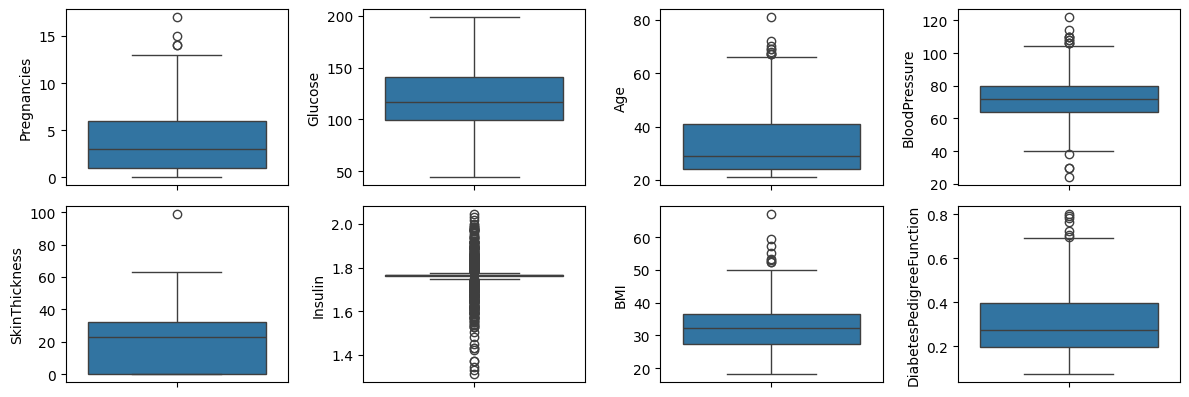

In [42]:
plt.figure(figsize=(12,6))

plt.subplot(3,4,1)
sns.boxplot(diabetes['Pregnancies'])

plt.subplot(3,4,2)
sns.boxplot(diabetes['Glucose'])

plt.subplot(3,4,3)
sns.boxplot(diabetes['Age'])

plt.subplot(3,4,4)
sns.boxplot(diabetes['BloodPressure'])

plt.subplot(3,4,5)
sns.boxplot(diabetes['SkinThickness'])

plt.subplot(3,4,6)
sns.boxplot(diabetes['Insulin'])

plt.subplot(3,4,7)
sns.boxplot(diabetes['BMI'])

plt.subplot(3,4,8)
sns.boxplot(diabetes['DiabetesPedigreeFunction'])

plt.tight_layout()
plt.show()

IN some features like Glucose, BMI, BloodPressure 0 Value is not possible so replace these values with NaN

In [24]:
import numpy as np
from sklearn.impute import SimpleImputer
diabetes[['Insulin','DiabetesPedigreeFunction']] = diabetes[['Insulin','DiabetesPedigreeFunction']].replace(0, np.nan)

Median Imputation

In [25]:
imputer = SimpleImputer(strategy='median')
diabetes[['Insulin','DiabetesPedigreeFunction']] = imputer.fit_transform(diabetes[['Insulin','DiabetesPedigreeFunction']])

In [26]:
diabetes[['Insulin','DiabetesPedigreeFunction']] = np.log1p(diabetes[['Insulin','DiabetesPedigreeFunction']])

In [27]:
diabetes[['Glucose','BloodPressure','BMI']] = diabetes[['Glucose','BloodPressure','BMI']].replace(0, np.nan)

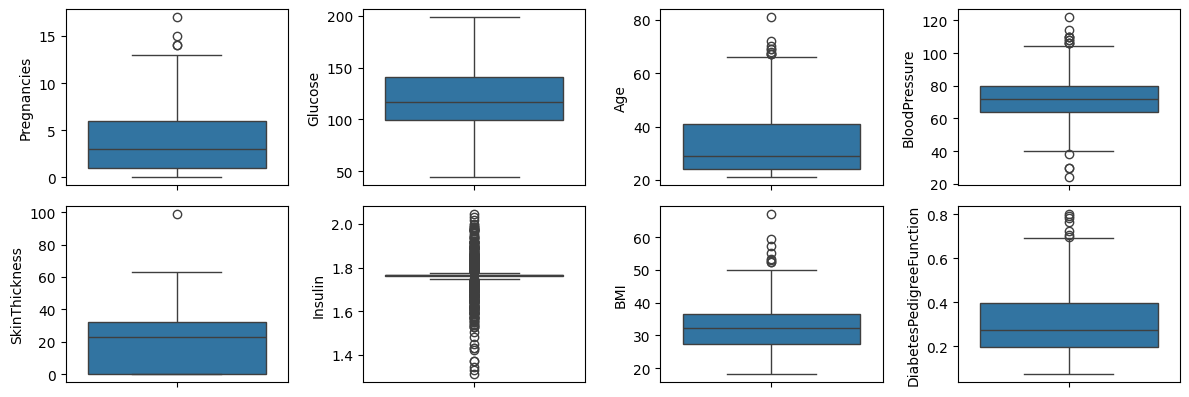

In [28]:
plt.figure(figsize=(12,6))

plt.subplot(3,4,1)
sns.boxplot(diabetes['Pregnancies'])

plt.subplot(3,4,2)
sns.boxplot(diabetes['Glucose'])

plt.subplot(3,4,3)
sns.boxplot(diabetes['Age'])

plt.subplot(3,4,4)
sns.boxplot(diabetes['BloodPressure'])

plt.subplot(3,4,5)
sns.boxplot(diabetes['SkinThickness'])

plt.subplot(3,4,6)
sns.boxplot(diabetes['Insulin'])

plt.subplot(3,4,7)
sns.boxplot(diabetes['BMI'])

plt.subplot(3,4,8)
sns.boxplot(diabetes['DiabetesPedigreeFunction'])

plt.tight_layout()
plt.show()

Check ImBalance output

In [15]:
diabetes['Outcome'].value_counts()


,count
Outcome,
0,500
1,268


Data is imbalenced so we use stratified split in our dataset

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(diabetes.drop('Outcome',axis=1),diabetes['Outcome'],test_size=.2,stratify=diabetes['Outcome'],random_state=42)

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(class_weight='balanced'))
])

In [38]:
pipeline.fit(X_train, Y_train)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()),
                ('model', LogisticRegression(class_weight='balanced'))])

In [39]:
print("Accuracy:", pipeline.score(X_test, Y_test))

Accuracy: 0.7272727272727273


In [40]:
from sklearn.metrics import accuracy_score

y_pred = pipeline.predict(X_test)
print("Accuracy:", accuracy_score(Y_test, y_pred))

Accuracy: 0.7272727272727273


In [41]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.73      0.78       100
           1       0.59      0.72      0.65        54

    accuracy                           0.73       154
   macro avg       0.71      0.73      0.71       154
weighted avg       0.75      0.73      0.73       154

